<a href="https://colab.research.google.com/github/AnthonyAssayah/Adaline_NeuroComputation/blob/main/Adaline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import os
import pandas as pd

# Function to check if the file has the correct structure
def is_correct_structure(file_path):
  with open(file_path, 'r') as f:
      lines = f.readlines()
      if len(lines) != 3:
        return False
      for line in lines:
        try:
          values = eval(line.strip())
        except:
          continue
        if len(values) != 101 or values[0] not in [1, 2, 3]:
          return False
  return True

# Function to load data from a file and return a list of tuples (label, vector)
def load_data_from_file(file_path):
  data = []
  with open(file_path, 'r') as f:
    lines = f.readlines()
    for line in lines:
      try:
        values = eval(line.strip())
      except:
        continue
      label = int(values[0])
      vector = list(values[1:])
      data.append((label, vector))
  return data

# Main function to load all txt files in a directory and make a pandas dataframe
def load_data_from_directory(dir_path):
  all_data = []
  for file in os.listdir(dir_path):
    file_path = os.path.join(dir_path, file)
    if file.endswith('.txt') and is_correct_structure(file_path):
      all_data.extend(load_data_from_file(file_path))
  
  df = pd.DataFrame(all_data, columns=['label', 'vector'])
  return df

# Example usage
# Example usage
dir_path_1 = 'vec1'
dir_path_2 = 'vec2'

dataframe_1 = load_data_from_directory(dir_path_1)
dataframe_2 = load_data_from_directory(dir_path_2)

# Combine dataframes from both directories
combined_dataframe = pd.concat([dataframe_1, dataframe_2], ignore_index=True)
print(combined_dataframe)

# Save the dataframe to a CSV file
combined_dataframe.to_csv('combined_dataframe.csv', index=False)

# Save the dataframe to a Pickle file
combined_dataframe.to_pickle('combined_dataframe.pkl')

      label                                             vector
0         1  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...
1         1  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...
2         1  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...
3         2  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...
4         2  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...
...     ...                                                ...
2461      1  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...
2462      1  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...
2463      3  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...
2464      3  [-1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1...
2465      3  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...

[2466 rows x 2 columns]


In [69]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

class Adaline(object):
    # Initializing the learning rate, epoch, weights, and costs
    def __init__(self, rate=0.001, epoch=50):
        self.l_rate = rate
        self.epoch = epoch
        self.weights = [] # weights will be initialized in the `fit` method
        self.costs = [] # empty list to store the cost of each epoch

    # Fitting the model to the training data
    def fit(self, X, y):
        # Get the number of rows and columns in the data
        row = X.shape[0]
        col = X.shape[1]
        # Adding bias to the data
        X = self._bias(X, (row, col))
        # Initializing the weights with random values
        np.random.seed(1)
        self.weights = np.random.rand(col + 1)
        # Training the model
        for epoch in range(self.epoch):
            # Shuffle the data randomly
            X, y = self._shuffle(X, y)
            cost = []
            # Loop through each sample in the data and update the weights
            for sample, label in zip(X, y):
                cost.append(self._update_weights(sample, label))
            # Compute the average cost for this epoch and append it to the costs list
            avg = sum(cost) / len(y)
            self.costs.append(avg)
        return self

    # Updating the weights
    def _update_weights(self, sample, label):
        # Calculate the output of the neuron
        result = self.net_input(sample)
        # Calculate the error
        error = label - result
        # Update the weights using the formula
        # weights = weights + learning_rate * input * error
        self.weights += self.l_rate * sample.dot(error)
        # Calculate the cost for this sample and return it
        return (error ** 2) / 2

    # Shuffling the data randomly
    def _shuffle(self, X, y):
        # Generate a random permutation of the indices
        per = np.random.permutation(len(y))
        # Return the shuffled data
        return X[per], y[per]

    # Calculating the net input using matrix multiplication
    def net_input(self, X):
        return np.dot(X, self.weights)

    # Predicting the class labels for the test data
    def predict(self, X):
        # Add bias to the test data if necessary
        if len(X.T) != len(self.weights):
            X = self._bias(X, (X.shape[0], X.shape[1]))
        # Calculate the net input for the test data
        net_input = self.net_input(X)
        # Return the predicted class labels using the sign function
        return np.where(net_input > 0.0, 1, -1)

    # Adding bias to the data
    def _bias(self, X, size):
        # Create an array of ones with the same number of rows as the data and one more column
        bias = np.ones((size[0], size[1] + 1))
        # Set the values in the new array to be equal to the original data
        bias[:, 1:] = X
        # Return the new array with bias added to the data
        return bias


# Function print confusion matrix 
def plot_confusion_matrix(predictions, y_test):
    cm = confusion_matrix(predictions, y_test)
    plt.subplots()
    sns.heatmap(cm, fmt=".0f", annot=True)
    plt.title("Confusion matrix")
    plt.xlabel("Actual label")
    plt.ylabel("Predicted label")


def classify(X, y, label_pair):
    label1, label2 = label_pair

    # Filter the dataframe to include only the specified labels
    dataframe = pd.DataFrame({'vector': list(X), 'label': list(y)})
    dataframe = dataframe[dataframe['label'].isin(label_pair)]

    # Prepare the input data (X) and labels (y)
    X = np.array([np.array(x) for x in dataframe['vector']])
    y = np.array(dataframe['label'])

    # Convert labels to -1 and 1
    y = np.where(y == label1, -1, 1)
    y = np.where(y == label2, 1, y)

    # Normalize the input data
    X = (X - X.mean()) / X.std()

    # Cross-validate the Adaline classifier
    skf = StratifiedKFold(n_splits=5, shuffle=True)
    accuracies = []
    for i, (train_index, test_index) in enumerate(skf.split(X, y)):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        adaline = Adaline(rate=0.001, epoch=50)
        adaline.fit(X_train, y_train)
        predictions = adaline.predict(X_test)
        accuracy = np.mean(predictions == y_test)
        accuracies.append(accuracy)
        print(f"Iteration {i+1}: Test accuracy: {accuracy * 100:.2f}%")

        # Print confusion matrix and classification report
        cm = plot_confusion_matrix(predictions, y_test)
        cr = classification_report(y_test, predictions, target_names=['Negative', 'Positive'])
        print(f"\nClassification reportfor iteration {i+1}:\n{cr}\n")

    # Calculate the average accuracy and standard deviation
    avg_accuracy = np.mean(accuracies)
    std_deviation = np.std(accuracies)
    print(f"Average accuracy: {avg_accuracy * 100:.2f}%")
    print(f"Standard deviation: {std_deviation * 100:.2f}%\n")
    return avg_accuracy, std_deviation



************* Classify 'ב' vs 'מ' *************
Iteration 1: Test accuracy: 83.28%

Classification reportfor iteration 1:
              precision    recall  f1-score   support

    Negative       0.82      0.85      0.84       165
    Positive       0.85      0.81      0.83       164

    accuracy                           0.83       329
   macro avg       0.83      0.83      0.83       329
weighted avg       0.83      0.83      0.83       329


Iteration 2: Test accuracy: 78.35%

Classification reportfor iteration 2:
              precision    recall  f1-score   support

    Negative       0.83      0.72      0.77       165
    Positive       0.75      0.85      0.80       163

    accuracy                           0.78       328
   macro avg       0.79      0.78      0.78       328
weighted avg       0.79      0.78      0.78       328


Iteration 3: Test accuracy: 79.88%

Classification reportfor iteration 3:
              precision    recall  f1-score   support

    Negative       

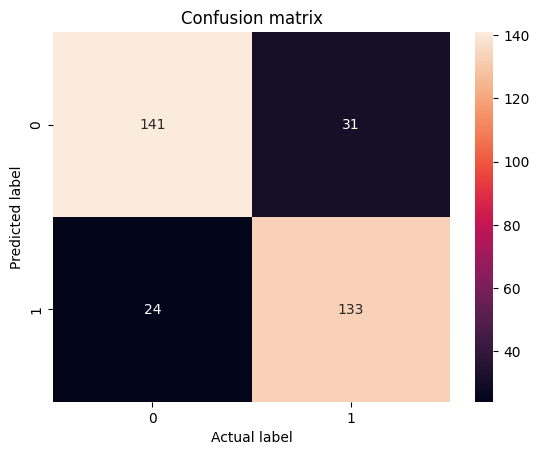

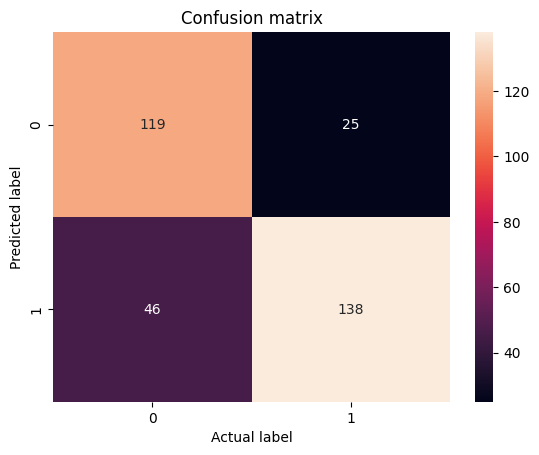

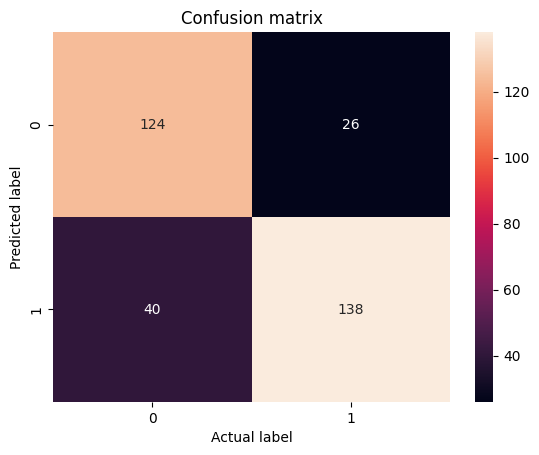

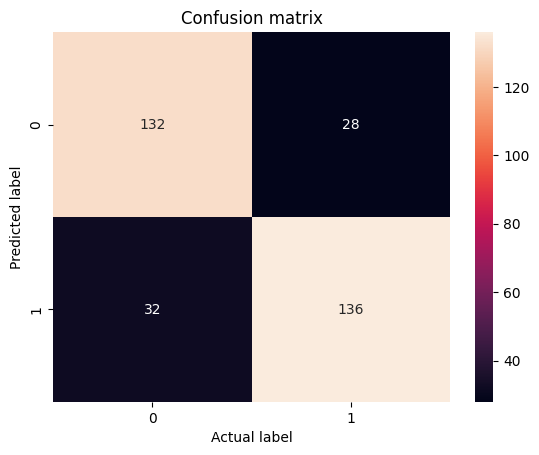

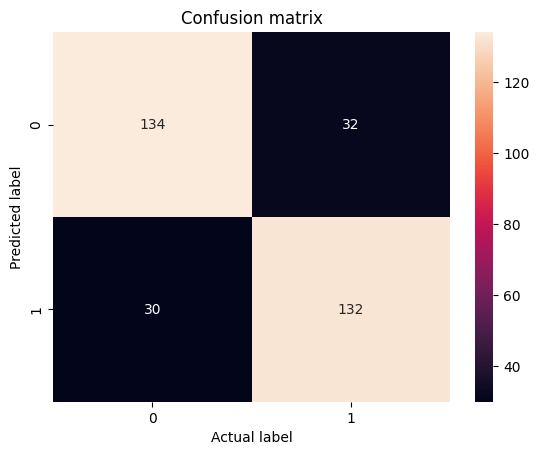

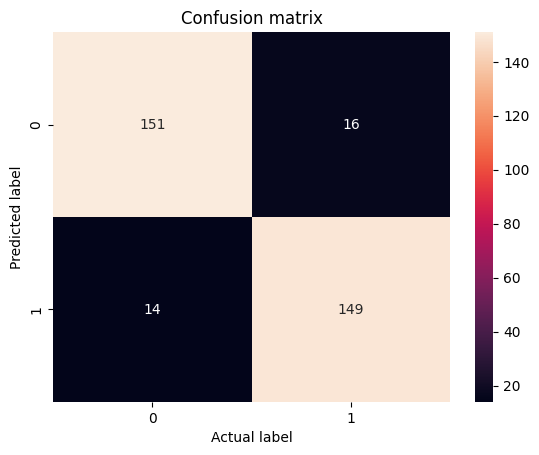

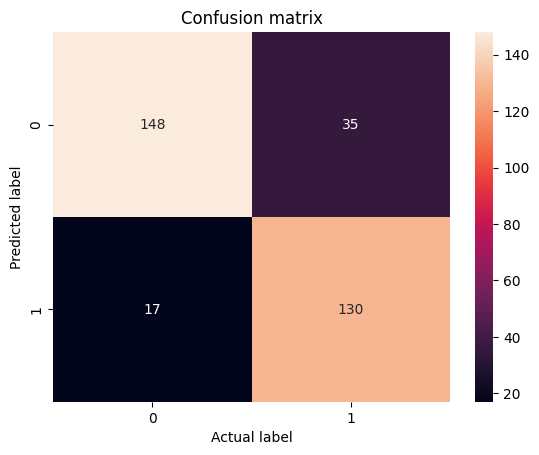

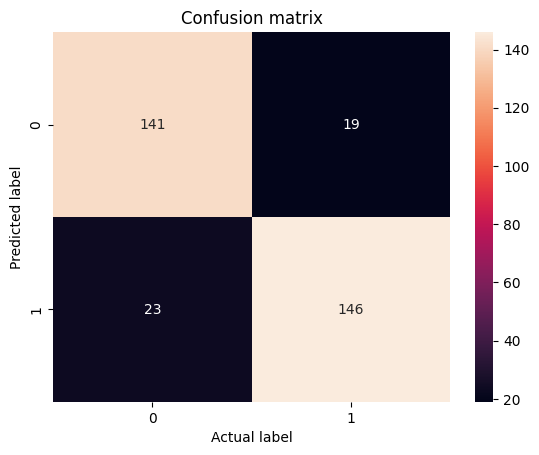

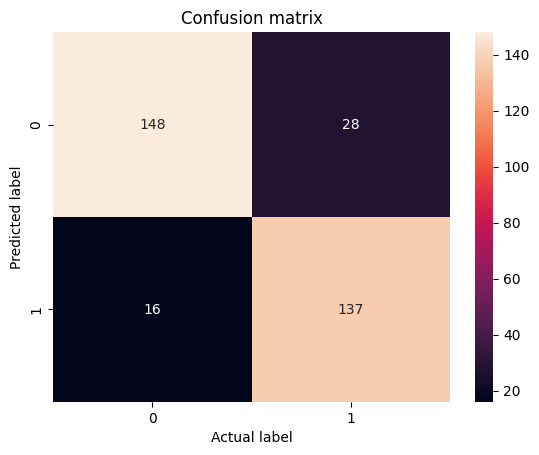

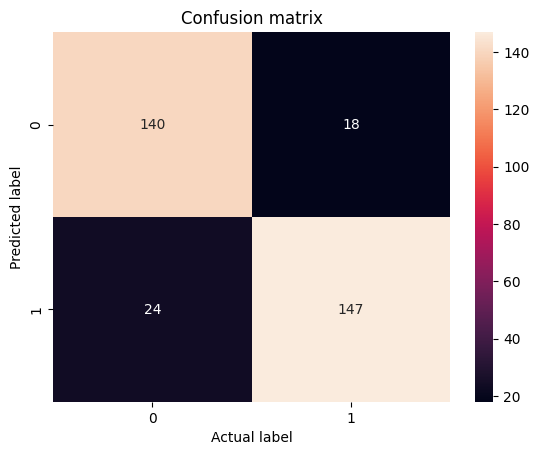

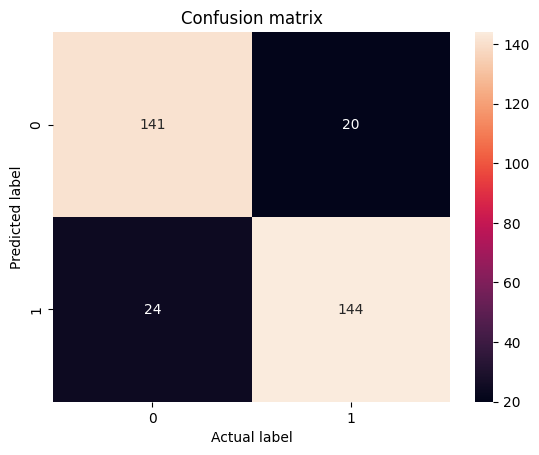

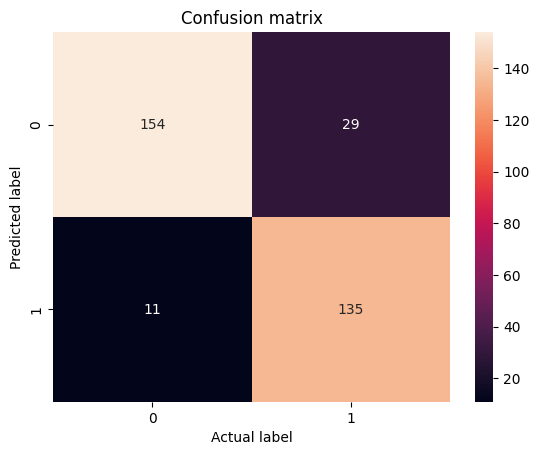

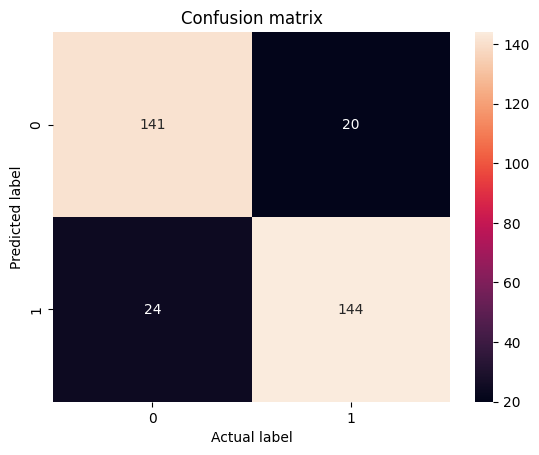

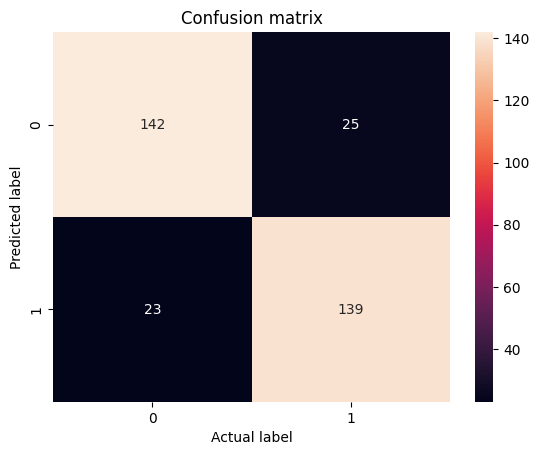

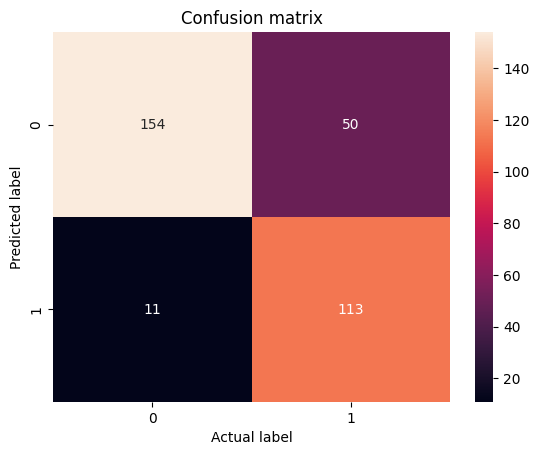

In [70]:
if __name__ == '__main__':
    # Load the saved dataframe
    dataframe = pd.read_pickle('combined_dataframe.pkl')

    # Classify 'ב' vs 'מ'
    print("************* Classify 'ב' vs 'מ' *************")
    label_pair = [1, 3]
    classify(dataframe['vector'], dataframe['label'], label_pair)

    # Classify 'ב' vs 'ל'
    print("************* Classify 'ב' vs 'ל' *************")
    label_pair = [1, 2]
    classify(dataframe['vector'], dataframe['label'], label_pair)

    # Classify 'מ' vs 'ל'
    print("************* Classify 'ל' vs 'מ' *************")
    label_pair = [2, 3]
    classify(dataframe['vector'], dataframe['label'], label_pair)
  